# Naive value iteration, using a hungry lion
We start by creating a model of a lion. Whenever it gets hungry, it will go hunting and hopefully catch a prey. However, if it fails, it might starve to death...

In [1]:
from stormvogel.model import Model, ModelType

lion = Model(name="lion", model_type=ModelType.DTMC)
init = lion.get_initial_state()
full = lion.new_state("full :D")
satisfied = lion.new_state("satisfied :)")
hungry = lion.new_state("hungry :(")
starving = lion.new_state("starving :((")
rawr = lion.new_state("rawr")
hunt = lion.new_state("hunt >:D")
desperate_hunt = lion.new_state("desparate hunt!")
dead = lion.new_state("dead...")

init.set_transitions([(1, satisfied)])
satisfied.set_transitions([(1, hungry)])
hungry.set_transitions([(1, hunt)])
starving.set_transitions([(1, desperate_hunt)])
hunt.set_transitions([(0.5, full), (0.3, starving), (0.2, satisfied)])
full.set_transitions([(1, satisfied)])
desperate_hunt.set_transitions([(0.2, full), (0.3, starving), (0.1, dead), (0.4, satisfied)])
lion.add_self_loops()

from stormvogel.show import show
from stormvogel.layout import Layout
vis = show(lion, show_editor=False, separate_labels=["dead...", "hunt >:D", "desparate hunt!"], layout=Layout("layouts/lion.json"))

Output()

Stormvogel succesfully started the internal communication server, but could not receive the result of a test request.
Stormvogel is still usable without this, but you will not be able to save node positions in a layout json file.
1) Restart the kernel and re-run.
2) Is the port 127.0.0.1:8889 (from the machine where jupyterlab runs) available?
If you are working remotely, it might help to forward this port. For example: 'ssh -N -L 8889:127.0.0.1:8889 YOUR_SSH_CONFIG_NAME'.
3) You might also want to consider changing stormvogel.communication_server.localhost_address to the IPv6 loopback address if you are using IPv6.
If you cannot get the server to work, set stormvogel.communication_server.enable_server to false and re-run. This will speed up stormvogel and ignore this message.
Please contact the stormvogel developpers if you keep running into issues.


Output()

Here we provide an implementation of naive value iteration using the model API.

In [2]:
def naive_value_iteration(model, steps, starting_state):
    if steps < 2:
        print("Need at least two steps")
        return
    if model.type != ModelType.DTMC:
        print("Only works for DTMC")
        return

    # Create a matrix and set the value for the starting state to 1 on the first step.
    matrix_steps_states = [[0 for s in model.states] for x in range(steps)]
    matrix_steps_states[0][starting_state] = 1

    # Apply the updated values for each step.
    for current_step in range(steps-1):
        next_step = current_step + 1
        for s_id, s in model.get_states().items():
            branch = model.get_branch(s)
            for transition_prob, target in branch.branch:
                current_prob = matrix_steps_states[current_step][s_id]
                matrix_steps_states[next_step][target.id] += current_prob * transition_prob

    return matrix_steps_states
        

We apply naive value iteration on our lion model with 20 steps. Then we display the result of the as a heatmap, using matplotlib.

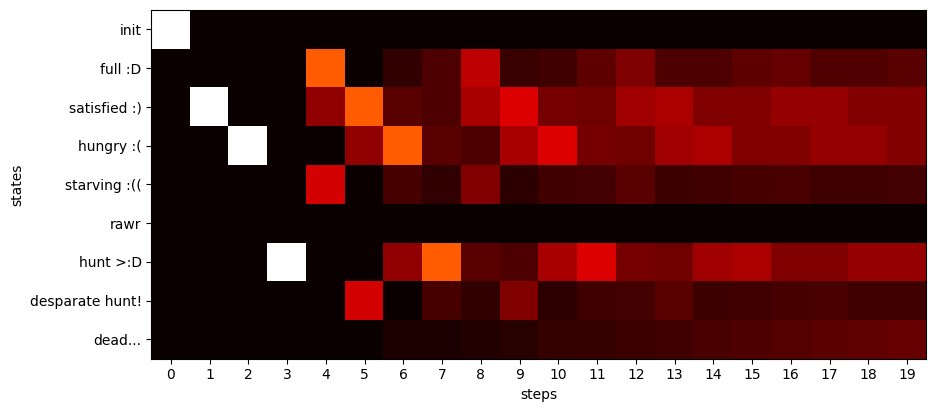

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def invert_2d_list(l):
    res = []
    for i in range(len(l[0])):
        sublist =  []
        for j in range(len(l)):
            sublist.append(l[j][i])
        res.append(sublist)
    return res


def display_naive_value_iteration_result(res, size):
    fig, ax = plt.subplots(1,1)
    yticks = [s.labels[0] for s in lion.get_states().values()] + [""]
    ax.set_xticks(range(len(res)))
    ax.set_yticks(range(len(res[0]) + 1))
    ax.set_yticklabels(yticks)
    
    ax.imshow(invert_2d_list(res), cmap='hot', interpolation='nearest', aspect="equal")
    plt.xlabel("steps")
    plt.ylabel("states")
    fig.set_size_inches(size,size)
    
    plt.show()

res = naive_value_iteration(lion, 20, starting_state=lion.get_initial_state().id)
display_naive_value_iteration_result(res, 10)